<a href="https://colab.research.google.com/github/ah20776/CE888/blob/Lab2/Lab2/Lab2_of_bootstrap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook you'll create your own bootstrap function following the bootstrap algorithm (check the lecture notes!)

In [282]:
import matplotlib
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt




In [283]:
# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/customers.csv')
data = df.values.T[1]
print (data)
size= np.size(data)
bootstraps=int(input(" Enter number of bootstraps: "))


[ 2.  8. 20. 13.  5.  9. 10.  8. 22. 10.  2.  4.  7.  9.]
 Enter number of bootstraps: 10000


In [268]:
# Checking the notes from the lecture, create here your own bootstrap function:
# 1. Sample from the input array x to create an array of samples of shape (n_bootstraps, sample_size)
# Hint: Check the function random.choice() on Numpy
# 2. Calculate and save the mean of the array (this is "data_mean" that is returned by the function)
# 3. Calculate the mean from each bootstrap (i.e., row) and store it.
# (This should be an array of n_bootstraps values)
# 4. Calculate the lower and upper bounds for a 95% CI (hint: check the percentile function on Numpy)
# 5. Return data_mean, and the lower and upper bounds of your interval
def bootstrap_mean(x, sample_size, n_bootstraps):
   samples = np.random.choice(x,(n_bootstraps,sample_size))
   print (samples)
   sample_mean=samples.mean(axis=1)
   sorted_data=np.sort(sample_mean)
   data_mean = np.mean(sorted_data)
   print (sample_mean)
   '''def bubble_sort(in_list):
    # YOUR CODE HERE
    n=len(in_list)
    for i in range(n-1):
      for j in range(0,n-i-1):
        if in_list[j]>in_list[j+1]:
          in_list[j],in_list[j+1] = in_list[j+1],in_list[j]
    return(in_list)
   data_mean=bubble_sort(sample_mean)'''
   ci=95
   bi=100-ci
   '''alpha=ci/100
   p= ((1-alpha)/2)
   q=(alpha+((1-alpha)/2))'''
   lower = np.percentile(sorted_data, bi)
   upper = np.percentile(sorted_data,ci)
   '''lower = (data_mean[0] + a)
   upper = (data_mean[-1] - a)'''
   return data_mean, lower, upper
print (bootstrap_mean(data,size,bootstraps))

# <---INSERT YOUR CODE HERE--->
#return data_mean, lower, upper


[[ 8. 22. 10. 10.  8.  9.  8.  8.  8.  2.  5.  9.  9.  2.]
 [22.  9. 22.  8.  8. 10. 22.  4.  8.  8.  7.  2. 20.  7.]
 [ 2. 10. 22.  8. 13.  2. 13. 22.  7.  7.  9. 10.  8.  2.]
 [ 8. 20.  2.  9.  7.  9. 10. 20.  2. 10.  4.  8. 20. 10.]
 [10.  8. 13. 10. 20.  9. 22. 10.  9. 20. 22. 10.  8.  8.]
 [ 4.  9.  7.  8.  9. 22.  2.  4.  7. 10.  9.  4.  9. 13.]
 [ 4. 10.  8.  2.  2.  2. 13.  2. 13.  7. 20. 10.  9.  2.]
 [ 5.  2. 10.  5.  9.  2.  5. 22.  4. 13. 13.  5. 10.  2.]
 [ 4.  7.  5.  8. 13.  9.  2.  2. 10.  4. 22.  9.  2.  9.]
 [20.  8.  7.  7.  4. 10.  9.  9.  9.  7.  9.  9. 22.  8.]]
[ 8.42857143 11.21428571  9.64285714  9.92857143 12.78571429  8.35714286
  7.42857143  7.64285714  7.57142857  9.85714286]
(9.285714285714286, 7.492857142857144, 12.078571428571427)


[[10. 10. 13. ...  5.  7.  2.]
 [ 9.  2. 20. ...  9.  9.  9.]
 [10.  5.  8. ...  9. 20.  4.]
 ...
 [ 2. 20.  9. ...  5. 20.  5.]
 [ 4.  9.  7. ...  8. 22.  8.]
 [ 9. 13.  5. ... 20.  8.  8.]]
[ 8.42857143  8.64285714  8.78571429 11.          9.78571429  6.85714286
 10.07142857  7.92857143  8.21428571  7.78571429  7.85714286  6.21428571
  6.71428571  8.57142857 10.78571429  7.64285714  9.78571429  9.35714286
  7.14285714  7.21428571  8.35714286  8.78571429  8.92857143  8.42857143
 11.35714286 11.64285714 10.42857143  9.21428571  9.21428571 10.78571429
  9.64285714  6.57142857  9.21428571 11.14285714  8.78571429  9.21428571
  7.57142857  8.85714286 10.85714286 11.35714286  8.14285714  8.21428571
  8.64285714 10.14285714 12.42857143 11.          6.64285714  8.07142857
 11.21428571  7.14285714  9.71428571 10.35714286  8.42857143  6.14285714
  8.21428571  7.5         9.5         9.71428571  8.35714286  9.71428571
 10.21428571 10.35714286 10.71428571  8.42857143 10.92857143  9.07142857
  9.3

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 50000.0)

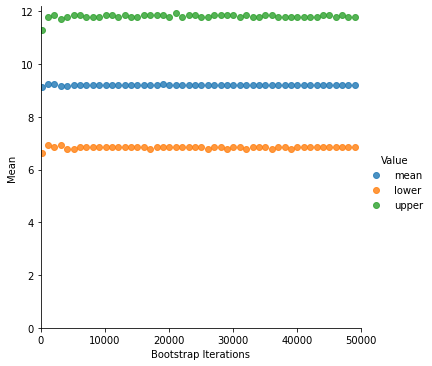

In [269]:
# Call your bootstrap function and plot the results

boots = []
for i in range(100, 50000, 1000):
    boot = bootstrap_mean(data, size, i)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Bootstrap Iterations', 'Mean', "Value"])

'''plt.plot (df_boot.columns[0], df_boot.columns[1])
plt.show()'''
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 50000)



Now, modify the bootstrap function you created above so that you can pass your desired confidence interval as a parameter.



In [284]:
def bootstrap_mean_ci(sample, sample_size, n_bootstraps, ci):
   samples = np.random.choice(sample,(n_bootstraps,sample_size))
   print (samples)
   sample_mean=samples.mean(axis=1)
   sorted_data=np.sort(sample_mean)
   data_mean = np.mean(sorted_data)
   print (sample_mean)
   '''def bubble_sort(in_list):
    # YOUR CODE HERE
    n=len(in_list)
    for i in range(n-1):
      for j in range(0,n-i-1):
        if in_list[j]>in_list[j+1]:
          in_list[j],in_list[j+1] = in_list[j+1],in_list[j]
    return(in_list)
   data_mean=bubble_sort(sample_mean)'''
   bi=100-ci
   '''alpha=ci/100
   p= ((1-alpha)/2)
   q=(alpha+((1-alpha)/2))'''
   lower = np.percentile(sorted_data, bi)
   upper = np.percentile(sorted_data,ci)
   '''lower = (data_mean[0] + a)
   upper = (data_mean[-1] - a)'''
   return data_mean, lower, upper
perc = int(input("Enter the value of required percentage of confidence needed: "))
print (bootstrap_mean_ci(data,size,bootstraps,perc))
# <---INSERT YOUR CODE HERE--->
#return data_mean, lower, upper

Enter the value of required percentage of confidence needed: 90
[[10.  8. 13. ...  2.  5.  9.]
 [22.  7.  2. ... 13. 20.  8.]
 [ 8.  2.  2. ...  8.  2. 22.]
 ...
 [ 4. 10.  8. ... 20. 10.  2.]
 [10.  9. 20. ...  9. 10. 20.]
 [ 7.  8.  7. ...  2.  8. 22.]]
[ 9.5        11.35714286  7.64285714 ... 10.          9.64285714
 11.28571429]
(9.203457142857141, 7.357142857142856, 11.214285714285714)


[[ 7. 22. 13. ...  8.  8.  9.]
 [ 7.  2.  5. ...  4.  8. 13.]
 [ 9.  5. 10. ...  9. 10.  9.]
 ...
 [ 2.  8. 20. ... 13. 10. 10.]
 [ 2.  2.  8. ...  4.  9. 10.]
 [ 2. 10.  8. ... 22.  4.  9.]]
[ 9.5         8.21428571  8.64285714  9.07142857  8.21428571 10.64285714
  7.57142857  8.          7.42857143  6.85714286  8.21428571  8.78571429
 12.57142857 11.14285714  6.35714286  9.35714286  9.42857143  6.92857143
  9.14285714  9.07142857  7.64285714  8.78571429  7.07142857 10.14285714
  8.42857143  8.78571429  9.64285714  9.28571429  9.35714286 10.85714286
  9.5         7.42857143 10.85714286 11.          9.07142857 11.57142857
 10.42857143 11.21428571  9.14285714  5.78571429  8.28571429  8.5
  9.5        10.85714286 10.92857143  9.64285714  7.42857143  9.28571429
  7.64285714  8.42857143 10.78571429  9.28571429  9.28571429  7.85714286
  7.78571429  7.85714286  9.42857143  9.42857143 10.07142857  8.5
 10.85714286  8.57142857 12.5         7.          9.71428571  9.57142857
 10.35714286 12.928

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 50000.0)

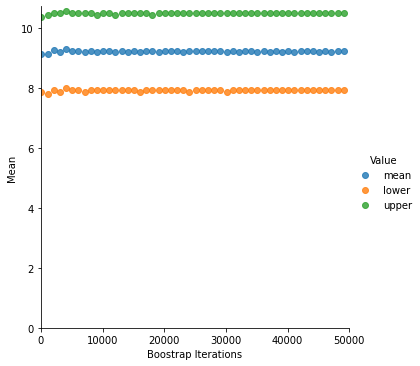

In [271]:
boots = []
for i in range(100, 50000, 1000):
    boot = bootstrap_mean_ci(data, data.shape[0], i, 80)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 50000)

#sns_plot.savefig("bootstrap_confidence_80.pdf", bbox_inches='tight')


# Vehicles dataset

Now let's work on a different dataset, which is stored in the vehicles.csv file.


In [272]:
# Load and visualise the vehicles dataset
# To load the dataset: https://neptune.ai/blog/google-colab-dealing-with-files (check section "Load individual files directly from GitHub")


# Note that the current and new fleets are in different columns and have different lengths, so bear this in mind when you're plotting.
# You can create separate scatterplots for the two fleets, as you would with the histograms, 
# or plot them both in one plot (but not one against the other).
# <---INSERT YOUR CODE HERE--->
# Note: you can add more cells as needed to organise your code and your plots

import matplotlib
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [273]:
# Load the data
data = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/vehicles.csv')
df=pd.DataFrame(data)
print (df)

     Current fleet  New Fleet
0               18       24.0
1               15       27.0
2               18       27.0
3               16       25.0
4               17       31.0
..             ...        ...
244             27        NaN
245             27        NaN
246             32        NaN
247             28        NaN
248             31        NaN

[249 rows x 2 columns]


In [274]:
curr_fleet=df['Current fleet']
print (curr_fleet)
new_fleet=df['New Fleet']
final_new_fleet= new_fleet.dropna(axis = 0, how ='any')
#new_df = new_fleet.fillna(18,45)
#new_df= df['New Fleet'].fillna(value=np.random.randn(), inplace=True)
#1-new_fleet=col_2.interpolate()
print(final_new_fleet)
#print(new_df)
#a=np.arange(1,250)
a=np.arange(len(curr_fleet))
b=pd.Series(a)
x=a.transpose()

0      18
1      15
2      18
3      16
4      17
       ..
244    27
245    27
246    32
247    28
248    31
Name: Current fleet, Length: 249, dtype: int64
0     24.0
1     27.0
2     27.0
3     25.0
4     31.0
      ... 
74    34.0
75    38.0
76    32.0
77    38.0
78    32.0
Name: New Fleet, Length: 79, dtype: float64


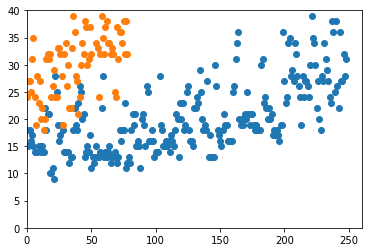

In [275]:
plt.ylim(0,40)
plt.xlim(0,260)
matplotlib.pyplot.scatter(x,curr_fleet)
matplotlib.pyplot.scatter(x,new_fleet)
plt.show()


## Compare the two fleets

The business analysts come up a comparison algorithm that requires the upper and lower bounds for the mean in order to say which fleet is better.
1. Calculate the mean of both samples.
2. Using the bootstrap function that you created:
    - Construct the 95% CI of the mean of the current fleet.
    - Construct the 95% CI of the mean of the new fleet.
    - Are they comparable? (i.e., is one better than the other?) -- you can do this with a permutation test (check the lecture notes!)

In [276]:
# <---INSERT YOUR CODE HERE--->
mean_curr_fleet= df['Current fleet'].mean()
print(mean_curr_fleet)
mean_new_fleet= final_new_fleet.mean()
print(mean_new_fleet)
size= len(curr_fleet)
size_new_fleet=len(final_new_fleet)
print(size)
print (size_new_fleet)


20.14457831325301
30.481012658227847
249
79
Enter number of bootstraps: 10


In [277]:
def bootstrap_mean_ci(sample, sample_size, n_bootstraps, ci):
   samples = np.random.choice(sample,(n_bootstraps,sample_size))
   print (samples)
   sample_mean=samples.mean(axis=1)
   sorted_data=np.sort(sample_mean)
   data_mean = np.mean(sorted_data)
   print (sample_mean)
   '''def bubble_sort(in_list):
    # YOUR CODE HERE
    n=len(in_list)
    for i in range(n-1):
      for j in range(0,n-i-1):
        if in_list[j]>in_list[j+1]:
          in_list[j],in_list[j+1] = in_list[j+1],in_list[j]
    return(in_list)
   data_mean=bubble_sort(sample_mean)'''
   bi=100-ci
   '''alpha=ci/100
   p= ((1-alpha)/2)
   q=(alpha+((1-alpha)/2))'''
   lower = np.percentile(sorted_data, bi)
   upper = np.percentile(sorted_data,ci)
   '''lower = (data_mean[0] + a)
   upper = (data_mean[-1] - a)'''
   return data_mean, lower, upper
perc = int(input("Enter the value of required percentage of confidence needed: "))
bootstraps=int(input("Enter number of bootstraps: "))
print ("For Current Fleet", bootstrap_mean_ci(curr_fleet,size,bootstraps,perc))

Enter the value of required percentage of confidence needed: 95
[[14 14 21 ... 18 18 17]
 [11 14  9 ... 18 13 39]
 [14 26 12 ... 13 25 31]
 ...
 [18 15 19 ... 13 18 24]
 [25 15 19 ... 15 31 17]
 [19 15 16 ... 19 21 11]]
[20.32128514 19.93975904 20.22891566 20.51004016 20.89156627 20.80321285
 20.63453815 20.8875502  19.46987952 19.95582329]
For Current Fleet (20.36425702811245, 19.681325301204822, 20.889759036144575)


In [281]:
def bootstrap_mean(sample, sample_size, n_bootstraps, ci):
   samples = np.random.choice(sample,(n_bootstraps,sample_size))
   print (samples)
   sample_mean=samples.mean(axis=1)
   sorted_data=np.sort(sample_mean)
   data_mean = np.mean(sorted_data)
   print (sample_mean)
   '''def bubble_sort(in_list):
    # YOUR CODE HERE
    n=len(in_list)
    for i in range(n-1):
      for j in range(0,n-i-1):
        if in_list[j]>in_list[j+1]:
          in_list[j],in_list[j+1] = in_list[j+1],in_list[j]
    return(in_list)
   data_mean=bubble_sort(sample_mean)'''
   bi=100-ci
   '''alpha=ci/100
   p= ((1-alpha)/2)
   q=(alpha+((1-alpha)/2))'''
   lower = np.percentile(sorted_data, bi)
   upper = np.percentile(sorted_data,ci)
   '''lower = (data_mean[0] + a)
   upper = (data_mean[-1] - a)'''
   return data_mean, lower, upper
perc = int(input("Enter the value of required percentage of confidence needed: "))
bootstraps=int(input("Enter number of bootstraps: "))
print ("For New Fleet", bootstrap_mean(final_new_fleet,size_new_fleet,bootstraps,perc))

Enter the value of required percentage of confidence needed: 95
Enter number of bootstraps: 10000
[[30. 36. 36. ... 31. 35. 38.]
 [34. 24. 32. ... 20. 30. 24.]
 [22. 34. 20. ... 31. 20. 32.]
 ...
 [37. 39. 32. ... 32. 31. 28.]
 [32. 30. 47. ... 36. 24. 47.]
 [41. 32. 32. ... 23. 30. 32.]]
[31.40506329 29.48101266 29.92405063 ... 30.5443038  30.63291139
 31.81012658]
For New Fleet (30.481267088607595, 29.366455696202532, 31.607594936708857)


In [285]:
# Create your own function for a permutation test here (you will need it for the lab quiz!):
def permut_test(sample1, sample2, n_permutations):
    i=0
    tobs= np.mean(sample2)-np.mean(sample1)
    for n in range(n_permutations):
      concat = np.concatenate((sample1, sample2))
      perm = np.random.permutation(concat)
      pold = perm[:int(len(perm)/2)]
      pnew = perm[int(len(perm)/2):]
      mean_pold= np.mean(pold)
      mean_pnew = np.mean(pnew)
      tperm= mean_pnew - mean_pold
      if (tperm > tobs):
         i+=1
         continue
    pvalue= i/n_permutations
        
    """
    sample1: 1D array
    sample2: 1D array (note that the size of the two arrays can be different)
    n_permutations: number of permutations to calculate the p-value
    """
    return pvalue
perm = int(input("Enter the number of permutation needed: "))
print ("pvalue is", permut_test(curr_fleet,final_new_fleet,perm))


Enter the number of permutation needed: 30000
pvalue is 0.0
